## Figure_5_Inference_Tool
modified slightly from the utility script used in

Paper: [Neural networks to learn protein sequence-function relationships from deep mutational scanning data](https://www.biorxiv.org/content/10.1101/2020.10.25.353946v3)

Git-repo: https://github.com/gitter-lab/nn4dms/blob/master/notebooks/

available under the MIT License, Copyright (c) 2020 Sam Gelman, Philip Romero, Anthony Gitter

### Attention 
1. Installation of nn4dms engin is required for running the following script
2. Datasets are pre-processed and integrated in the engin. Source data could be refered in Data/Source_Data/

In [3]:
# Essential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# nn4dms libs
import constants
import utils
import encode as enc
import inference as inf

### Part I. Producing Figure 5A&D

#### Key residues at spike RBD - ACE2 PD interface that highlited in Figure 5A&D

In [37]:
ACE2_variants = ["S19", "I21", "E23", "K26", "T27", "E35", "E37", "F40", "S43", "Y50", "N51", "T55", "N58", 
                 "Q60", "M62", "N64", "K68", "F72", "M82", "P84", "Q86", "G352", "D355"]
RBD_variants  = ["K417", "G446", "Y449", "Y453", "L455", "F456", "A475", "F486", "N487", "Y489", "Q493", "G496", "Q498", "T500", "N501", "G502", "Y505"]
list_mutants  = ["R", "K", "H", "D", "E", "Q", "N", "S", "T", "Y", "W", "F", "A", "I", "L", "M", "V", "G", "P", "C"]

In [38]:
RBD_variants_set = []
for i in list(RBD_variants):
    for j in list_mutants:
        variant= i + j
        RBD_variants_set.append(variant)

ACE2_variants_set = []
for i in list(ACE2_variants):
    for j in list_mutants:
        variant= i + j
        ACE2_variants_set.append(variant)

In [9]:
rbd_encoded_variants = enc.encode(encoding="one_hot,aa_index", variants=RBD_variants_set, ds_name="rbd-B")
rbd_encoded_variants.shape

(340, 194, 40)

In [10]:
pd_encoded_variants  = enc.encode(encoding="one_hot,aa_index", variants=ACE2_variants_set, ds_name="pd-B")
pd_encoded_variants.shape

(460, 596, 40)

#### Obtaining NN-derived Phenotypic score for RBD and ACE2 PD

In [ ]:
### RBD_cnn models - best one cnn Layer:2 Kernel:5 Filter:32
RBD_cnn_prefix = "../Trained_Models/Spike_RBD/Binding/SPIKERBD_BD_cnn2xk5f32"
RBD_cnn_predictions = inf.run_inference(encoded_data=rbd_encoded_variants, ckpt_prefix_fn=RBD_cnn_prefix)

In [ ]:
### ACE2 PD models - best one cnn Layer:2 Kernel:17 Filter:128
ACE2_cnn_prefix = "../Trained_Models/ACE2_PD/ACE2PD_cnn2xk17f128"
ACE2_cnn_predictions = inf.run_inference(encoded_data=pd_encoded_variants, ckpt_prefix_fn=ACE2_cnn_prefix)

#### Resulting Heatmap of Figure 5 B&E

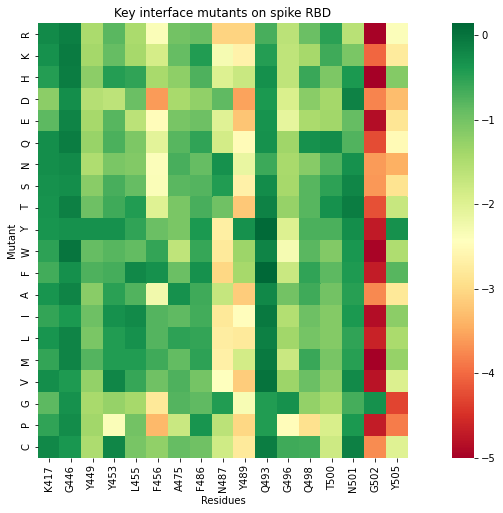

In [15]:
RBD_heatmap=pd.DataFrame(data=RBD_cnn_predictions.reshape(17,20), index=list(RBD_variants), columns=list_mutants)

fig, ax = plt.subplots(1,figsize=(16,8))
ax = sns.heatmap(RBD_heatmap.T, ax=ax, square=True,cmap="RdYlGn")
ax.set(xlabel="Residues", ylabel="Mutant", title="Key interface mutants on spike RBD")
#plt.savefig('RBD_heatmap.png')
plt.show()
plt.close(fig)

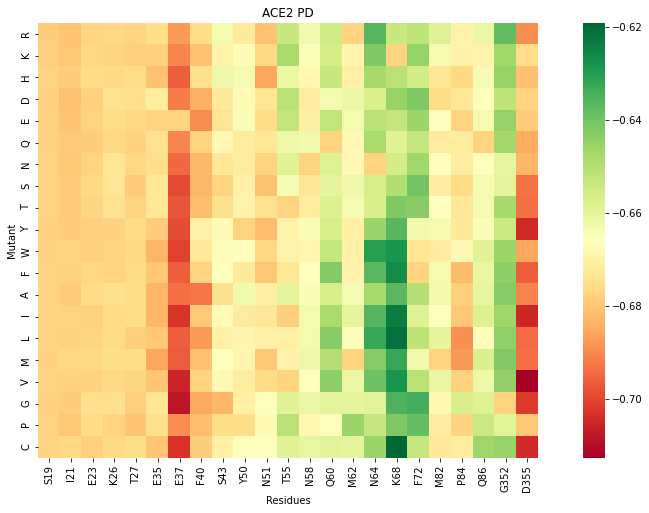

In [17]:
ACE2_heatmap=pd.DataFrame(data=ACE2_cnn_predictions.reshape(23,20), index=list(ACE2_variants), columns=list_mutants)

fig, ax = plt.subplots(1,figsize=(16,8))
ax = sns.heatmap(ACE2_heatmap.T, ax=ax, square=True,cmap="RdYlGn")
ax.set(xlabel="Residues", ylabel="Mutant", title="ACE2 PD")
#plt.savefig('ACE2_heatmap.png')
plt.show()
plt.close(fig)

### Part II. Infering mutations for spike RBD and ACE2 PD motif

#### YOUR_INPUT_LIST accepted for nn4dms engin:

##### Examples:
1. Single output for single-mutation: ["R346S"]
2. Single output for double-mutation: ["R346S, N440K"]
3. Single output for triple-mutation: ["R346S, N440K, K444R"]
4. Single output for arbitrary number of mutations: ["R346S, N440K, K444R..."]
5. Multiple outputs for above cases: ["R346S", "R346S, N440K", "R346S, N440K, K444R", "R346S, N440K, K444R..."]

In [26]:
### RBD_cnn models - best one cnn Layer:2 Kernel:5 Filter:32
RBD_best_bind_prefix = "../Trained_Models/Spike_RBD/Binding/SPIKERBD_BD_cnn2xk5f32"
### RBD gcn models - best one gcn Layer:1 Filter:128
RBD_best_expr_prefix = "../Trained_Models/Spike_RBD/Expression/SPIKERBD_expr_gc1xf128"

In [ ]:
rbd_best_bind_variants = enc.encode(encoding="one_hot,aa_index", variants=YOUR_INPUT_LIST, ds_name="rbd-B")
rbd_best_expr_variants = enc.encode(encoding="one_hot,aa_index", variants=YOUR_INPUT_LIST, ds_name="rbd")
rbd_best_bind_predictions = inf.run_inference(encoded_data=rbd_best_bind_variants, ckpt_prefix_fn=RBD_best_bind_prefix)
rbd_best_expr_predictions = inf.run_inference(encoded_data=rbd_best_expr_variants, ckpt_prefix_fn=RBD_best_expr_prefix)

#### You can export above binding and expression predictions or generating heatmaps as demonstrated below

### Part III Generating complete maps for spike RBD and ACE2 PD motif

#### map for spike RBD motif 
(Score table is stored in: Results/NN_Derived_Phenotypic_Scores)

In [82]:
rbd_wt_seq="TNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCG"
list_mutants  = ["R", "K", "H", "D", "E", "Q", "N", "S", "T", "Y", "W", "F", "A", "I", "L", "M", "V", "G", "P", "C"]

In [83]:
res_index=333
RBD_complete_variants=[]
RBD_res=[]
for res in rbd_wt_seq:
    RBD_res.append(res+str(res_index))
    for j in list_mutants:
        variant= res+str(res_index) + j
        RBD_complete_variants.append(variant)
    res_index+=1


In [84]:
### RBD_cnn models - best one cnn Layer:2 Kernel:5 Filter:32
RBD_complete_bind_prefix = "../Trained_Models/Spike_RBD/Binding/SPIKERBD_BD_cnn2xk5f32"
### RBD gcn models - best one gcn Layer:1 Filter:128
RBD_complete_expr_prefix = "../Trained_Models/Spike_RBD/Expression/SPIKERBD_expr_gc1xf128"

In [ ]:
rbd_complete_bind_variants = enc.encode(encoding="one_hot,aa_index", variants=RBD_complete_variants, ds_name="rbd-B")
rbd_complete_expr_variants = enc.encode(encoding="one_hot,aa_index", variants=RBD_complete_variants, ds_name="rbd")
rbd_complete_bind_predictions = inf.run_inference(encoded_data=rbd_complete_bind_variants, ckpt_prefix_fn=RBD_complete_bind_prefix)
rbd_complete_expr_predictions = inf.run_inference(encoded_data=rbd_complete_expr_variants, ckpt_prefix_fn=RBD_complete_expr_prefix)

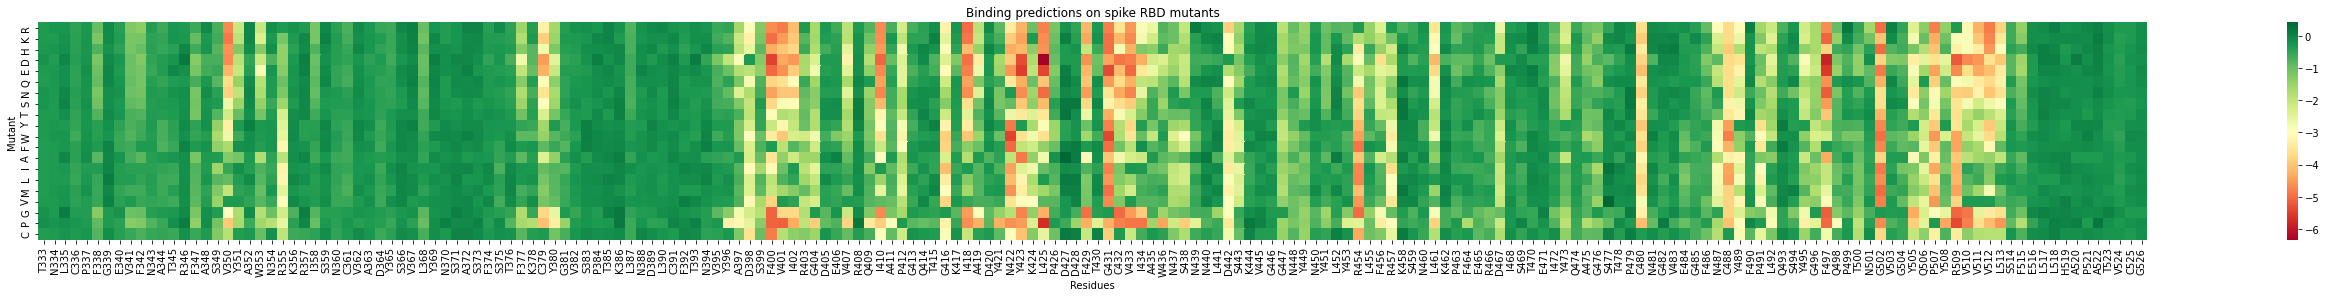

In [88]:
RBD_binding_heatmap=pd.DataFrame(data=rbd_complete_bind_predictions.reshape(194,20), index=list(RBD_res), columns=list_mutants)
fig, ax = plt.subplots(1,figsize=(50,4))
ax = sns.heatmap(RBD_binding_heatmap.T, ax=ax, square=True,cmap="RdYlGn")
ax.set(xlabel="Residues", ylabel="Mutant", title="Binding predictions on spike RBD mutants")
plt.show()
plt.close(fig)

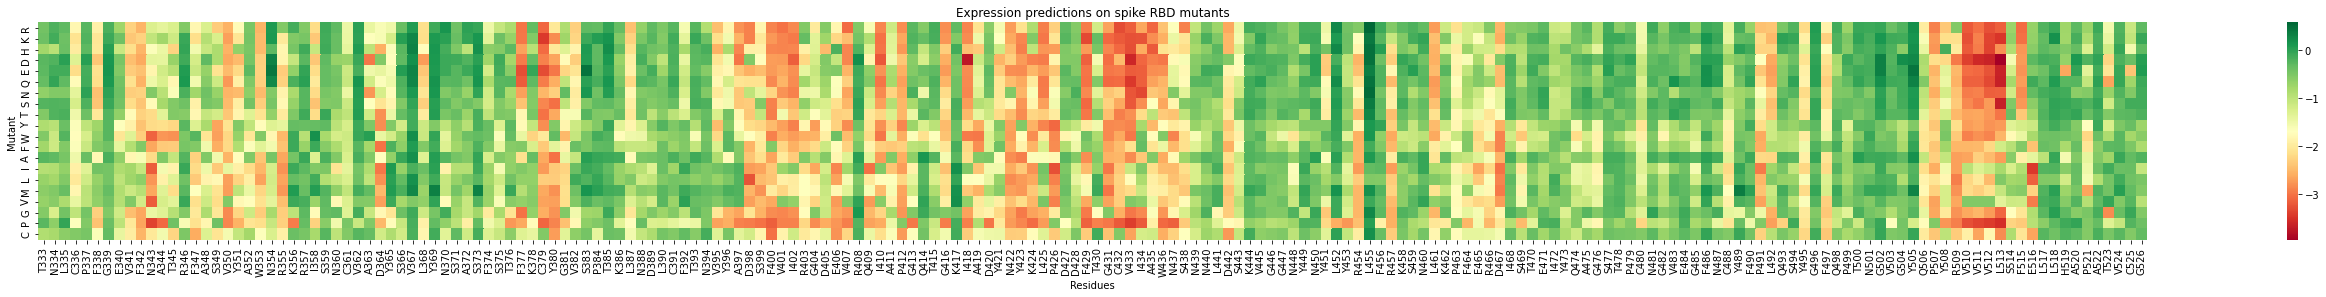

In [90]:
RBD_expr_heatmap=pd.DataFrame(data=rbd_complete_expr_predictions.reshape(194,20), index=list(RBD_res), columns=list_mutants)
fig, ax = plt.subplots(1,figsize=(50,4))
ax = sns.heatmap(RBD_expr_heatmap.T, ax=ax, square=True,cmap="RdYlGn")
ax.set(xlabel="Residues", ylabel="Mutant", title="Expression predictions on spike RBD mutants")
plt.show()
plt.close(fig)

#### map for ACE2 PD motif
(Score table is stored in: Results/NN_Derived_Phenotypic_Scores)

In [104]:
ace2_wt_seq= "STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNNAGDKWSAFLKEQSTLAQMYPLQEIQNLTVKLQLQALQQNGSSVLSEDKSKRLNTILNTMSTIYSTGKVCNPDNPQECLLLEPGLNEIMANSLDYNERLWAWESWRSEVGKQLRPLYEEYVVLKNEMARANHYEDYGDYWRGDYEVNGVDGYDYSRGQLIEDVEHTFEEIKPLYEHLHAYVRAKLMNAYPSYISPIGCLPAHLLGDMWGRFWTNLYSLTVPFGQKPNIDVTDAMVDQAWDAQRIFKEAEKFFVSVGLPNMTQGFWENSMLTDPGNVQKAVCHPTAWDLGKGDFRILMCTKVTMDDFLTAHHEMGHIQYDMAYAAQPFLLRNGANEGFHEAVGEIMSLSAATPKHLKSIGLLSPDFQEDNETEINFLLKQALTIVGTLPFTYMLEKWRWMVFKGEIPKDQWMKKWWEMKREIVGVVEPVPHDETYCDPASLFHVSNDYSFIRYYTRTLYQFQFQEALCQAAKHEGPLHKCDISNSTEAGQKLFNMLRLGKSEPWTLALENVVGAKNMNVRPLLNYFEPLFTWLKDQNKNSFVGWSTDWSPYA"
list_mutants  = ["R", "K", "H", "D", "E", "Q", "N", "S", "T", "Y", "W", "F", "A", "I", "L", "M", "V", "G", "P", "C"]

In [105]:
ace2_index=19
ACE2_complete_variants=[]
ACE2_res=[]
for res in ace2_wt_seq:
    ACE2_res.append(res+str(ace2_index))
    for j in list_mutants:
        variant= res+str(ace2_index) + j
        ACE2_complete_variants.append(variant)
    ace2_index+=1


In [106]:
### ACE2 PD models - best one cnn Layer:2 Kernel:17 Filter:128
ACE2_complete_bind_prefix = " ../Trained_Models/ACE2_PD/ACE2PD_cnn2xk17f128"

In [ ]:
ace2_complete_bind_variants  = enc.encode(encoding="one_hot,aa_index", variants=ACE2_complete_variants, ds_name="pd-B")
ace2_complete_bind_predictions = inf.run_inference(encoded_data=ace2_complete_bind_variants, ckpt_prefix_fn=ACE2_complete_bind_prefix)

In [109]:
ACE2_binding_heatmap=pd.DataFrame(data=ace2_complete_bind_predictions.reshape(596,20), index=list(ACE2_res), columns=list_mutants)
## demonstrated in two parts due the long residue length
df1 = ACE2_binding_heatmap[:298]
df2 = ACE2_binding_heatmap[298:]

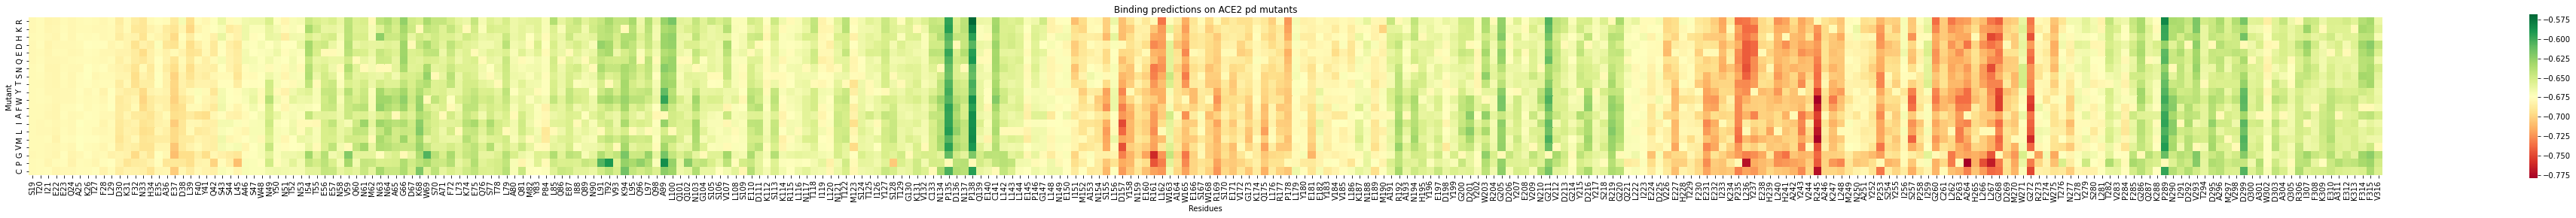

In [110]:
fig, ax = plt.subplots(1,figsize=(70,4))
ax = sns.heatmap(df1.T, ax=ax, square=True,cmap="RdYlGn")
ax.set(xlabel="Residues", ylabel="Mutant", title="Binding predictions on ACE2 pd mutants")
plt.show()
plt.close(fig)

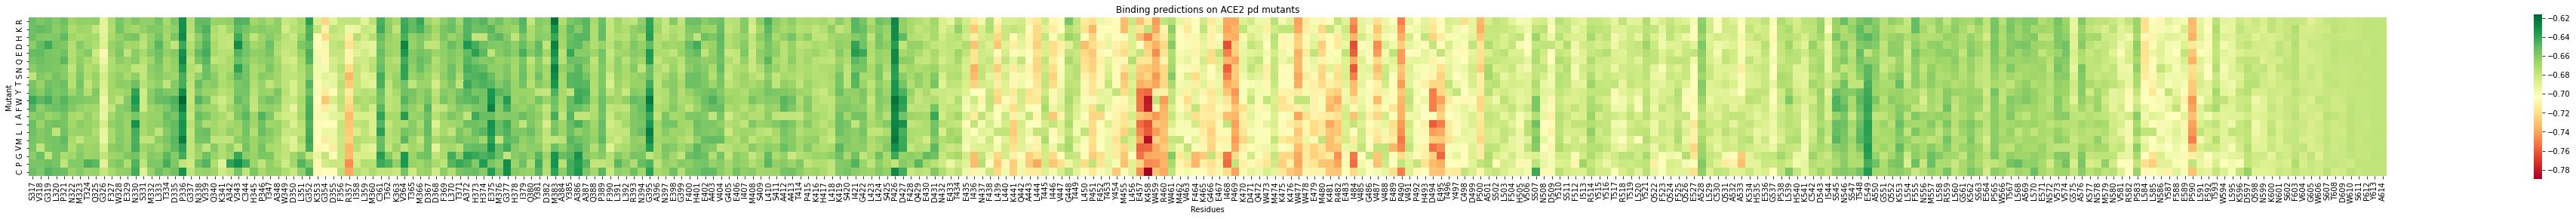

In [111]:
fig, ax = plt.subplots(1,figsize=(70,4))
ax = sns.heatmap(df2.T, ax=ax, square=True,cmap="RdYlGn")
ax.set(xlabel="Residues", ylabel="Mutant", title="Binding predictions on ACE2 pd mutants")
plt.show()
plt.close(fig)